In [3]:
from __future__ import print_function
import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,  Conv2D, MaxPooling2D
from keras import backend as K
now = datetime.datetime.now
batch_size = 128
num_classes = 5
epochs = 5
img_rows, img_cols = 28, 28
filters = 32
pool_size = 2
kernel_size = 3
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

def train_model(model, train, test, num_classes):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')
    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(train[1], num_classes)
    y_test = keras.utils.to_categorical(test[1], num_classes)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])
    t = now()
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    print('Training time: %s' % (now() - t))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_lt5 = x_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
x_test_lt5 = x_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]
x_train_gte5 = x_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5
x_test_gte5 = x_test[y_test >= 5]
y_test_gte5 = y_test[y_test >= 5] - 5



feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

# create complete model
model = Sequential(feature_layers + classification_layers)

# train model for 5-digit classification [0..4]
train_model(model,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

# freeze feature layers and rebuild model
for l in feature_layers:
    l.trainable = False

# transfer: train dense layers for new classification task [5..9]
train_model(model,
            (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes)


Using TensorFlow backend.
C:\Users\taniat470s\anaconda3_again\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\taniat470s\anaconda3_again\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\taniat470s\anaconda3_again\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\taniat470s\anaconda3_again\lib\site-pa






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
x_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 30596 samples, validate on 5139 samples
Epoch 1/5
30596/30596 [==============================] - 65s 2ms/step - loss: 0.1607 - acc: 0.9481 - val_loss: 0.0280 - val_acc: 0.9922
Epoch 2/5
30596/30596 [==============================] - 71s 2ms/step - loss: 0.0469 - acc: 0.9856 - val_loss: 0.0127 - val_acc: 0.9959
Epoch 3/5
30596/30596 [==============================] - 66s 2ms/step - loss: 0.0316 - acc: 0.9901 - val_loss: 0.0107 - val_acc: 0.9963
Epoch 4/5
30596/30596 [==============================] - 64s 2ms/step - loss: 0.0264 - acc: 0.9919 - val_loss: 0.0074 - val_acc: 0.9965
Epoch 5/5
30596/30596 [==============================] - 61s 2ms/step - loss: 0.0209 - acc: 0.9941 - val_loss: 0.0069 -

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [42]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
y_test.shape

(10000,)

In [8]:
input_shape

(28, 28, 1)

In [9]:
X_train_plot = x_train.reshape(-1, 28, 28)

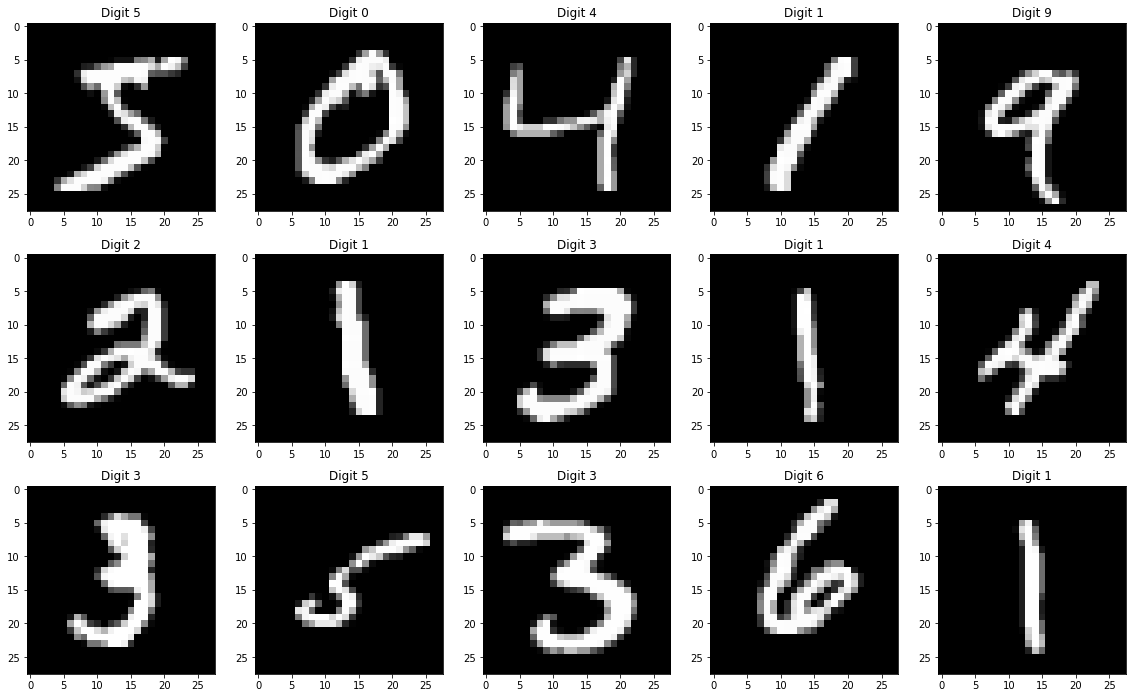

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def Show_example_digits(mono = 'gray'):
    fig = plt.figure(figsize = (16, 16))
    for idx in range(15):
        plt.subplot(5, 5,idx+1)
        plt.imshow(X_train_plot[idx], cmap = mono)
        plt.title("Digit {}".format(y_train[idx]))
        
    plt.tight_layout()
    
Show_example_digits()

In [11]:
import numpy as np
import pandas as pd


In [12]:
def plot_digit(digit, dem = 28, font_size = 12):
    max_ax = font_size * dem
    
    fig = plt.figure(figsize=(13, 13))
    plt.xlim([0, max_ax])
    plt.ylim([0, max_ax])
    plt.axis('off')
    black = '#000000'
    
    for idx in range(dem):
        for jdx in range(dem):

            t = plt.text(idx * font_size, max_ax - jdx*font_size, digit[jdx][idx], fontsize = font_size, color = black)
            c = digit[jdx][idx] / 255.
            t.set_bbox(dict(facecolor=(c, c, c), alpha = 0.5, edgecolor = 'black'))
            
    plt.show()

In [13]:
np.random.seed(0) 
import random

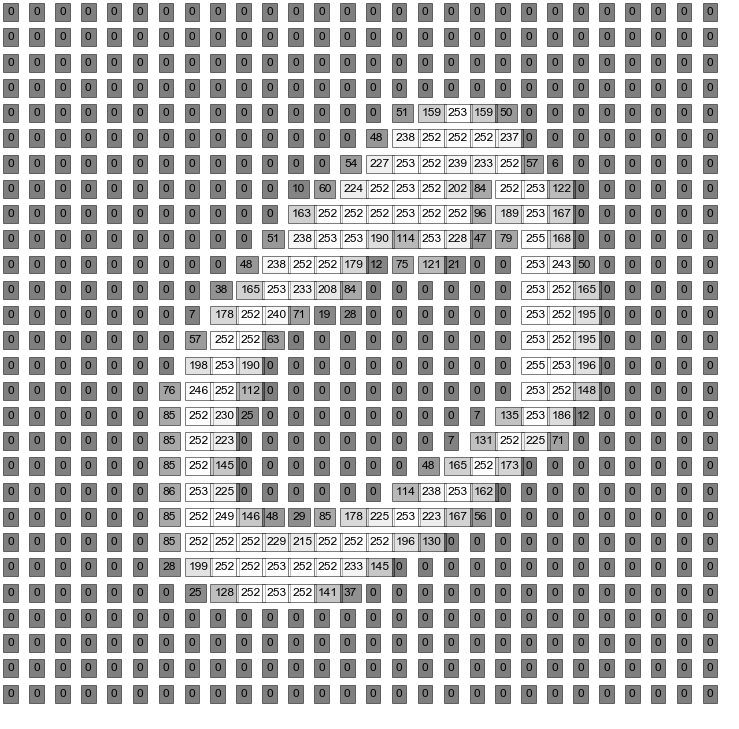

In [86]:
plot_digit(X_train_plot[1,:,:])

3


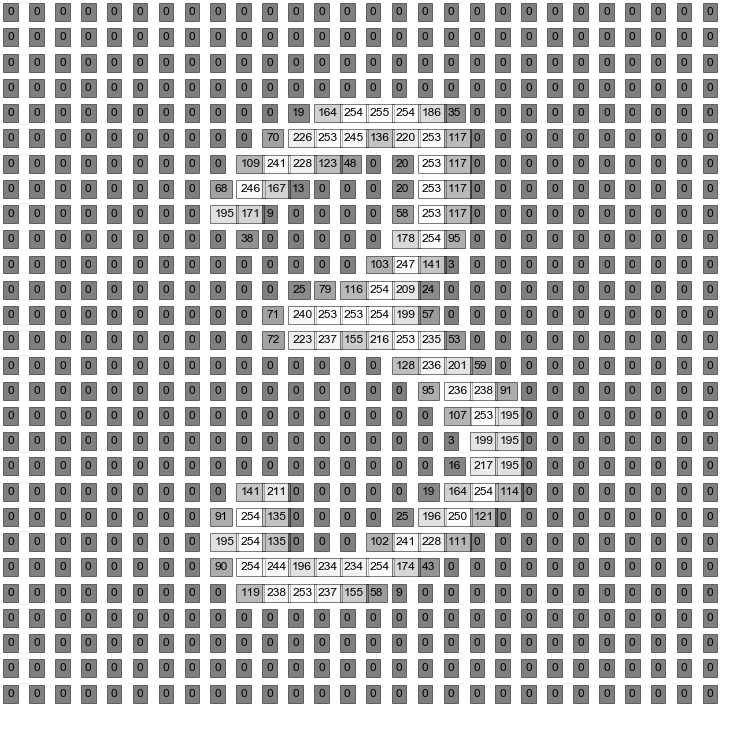

In [82]:
rand_number = random.randint(0, len(y_train))
print(y_train[rand_number])
plot_digit(X_train_plot[rand_number])

In [15]:
new_series = pd.Series(y_train)

In [16]:
new_series.value_counts().index

UInt64Index([1, 7, 3, 2, 9, 0, 6, 8, 4, 5], dtype='uint64')

In [40]:
new_series

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8

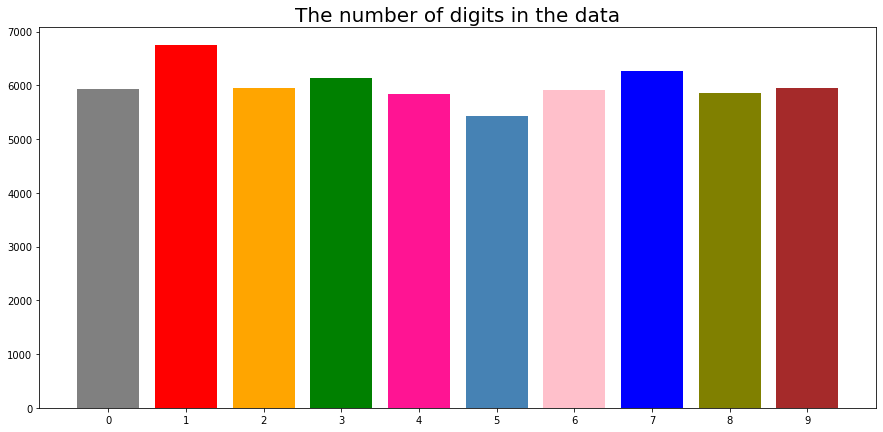

In [17]:
digit_range = np.arange(10)

val = new_series.value_counts().index
cnt = new_series.value_counts().values
mycolors = ['red', 'blue', 'green', 'orange', 'brown', 'grey', 'pink', 'olive', 'deeppink', 'steelblue']

plt.figure(figsize = (15, 7))
plt.title("The number of digits in the data", fontsize = 20)
plt.xticks(range(10))
plt.bar(val, cnt, color = mycolors);

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)             

In [19]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [20]:
input_shape

(28, 28, 1)

In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train[0].shape

(28, 28)

In [22]:
train=x_train
test=x_test

In [23]:
num_classes

5

In [24]:
train.shape[0]

60000

In [25]:
    y_train = keras.utils.to_categorical(y_train[1], num_classes)
    y_test = keras.utils.to_categorical(y_test[1], num_classes)

In [26]:
num_classes = 10
def train_model(model, train, test, num_classes):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')
    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(train[1], num_classes)
    y_test = keras.utils.to_categorical(test[1], num_classes)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])
    t = now()
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=1,
              verbose=1,
              validation_data=(x_test, y_test))
    y_pred = model.predict(x_test)
    print('Training time: %s' % (now() - t))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])
    return y_pred


In [27]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

# create complete model
model = Sequential(feature_layers + classification_layers)


In [28]:
yy = train_model(model,(x_train, y_train),(x_test, y_test), num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 118s 2ms/step - loss: 0.2870 - acc: 0.9122 - val_loss: 0.0611 - val_acc: 0.9811
Training time: 0:02:03.784677
Test score: 0.06108718138914555
Test accuracy: 0.9811


In [29]:
yy.shape

(10000, 10)

In [77]:
y_test.shape

(10000,)

In [79]:
yy.shape

(10000, 10)

In [80]:
def draw_output(idx_nums):
    plt.figure(figsize = (20, 20))
    plt.xticks( range(10) )
    x = np.ceil(np.sqrt(len(idx_nums)))
    cnt = 1
    for ph in idx_nums:
        plt.subplot(x, x, cnt)
        curr_photo = y_test[ph]
        
        plt.xlim(0, 10)
        plt.title("Digit: {0}\n idx: {1} ".format(np.argmax(y_test[ph]), ph), fontsize = 10) 
        plt.bar(range(10), yy[ph])
        
        cnt += 1

In [49]:
yy[:,1]

array([1.0118211e-07, 8.5191432e-06, 9.9945813e-01, ..., 7.9668894e-07,
       2.0570293e-07, 2.3529379e-08], dtype=float32)

In [33]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

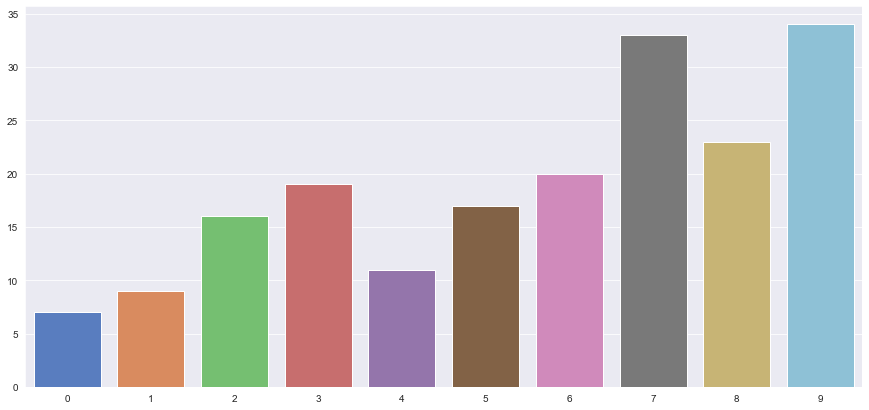

In [55]:
cnt_error = []
for idx, (a, b) in enumerate(zip(y_test, yy)):
    #if np.argmax(a) == np.argmax(b): continue
    #cnt_error.append( (np.argmax(a)) )
    if a == np.argmax(b): continue
    cnt_error.append( (a) )

cnt_error = np.unique(cnt_error, return_counts = True)
sns.set_style("darkgrid")
plt.figure(figsize = (15, 7))
bar_plot = sns.barplot(cnt_error[0], cnt_error[1], palette="muted")
plt.show()

In [64]:
x_train.shape

(60000, 28, 28)

In [63]:
x_test.shape[:-1]

(10000, 28)

In [65]:
X_test_plot = x_test.reshape(-1, 28, 28)

ValueError: num must be 1 <= num <= 25, not 26

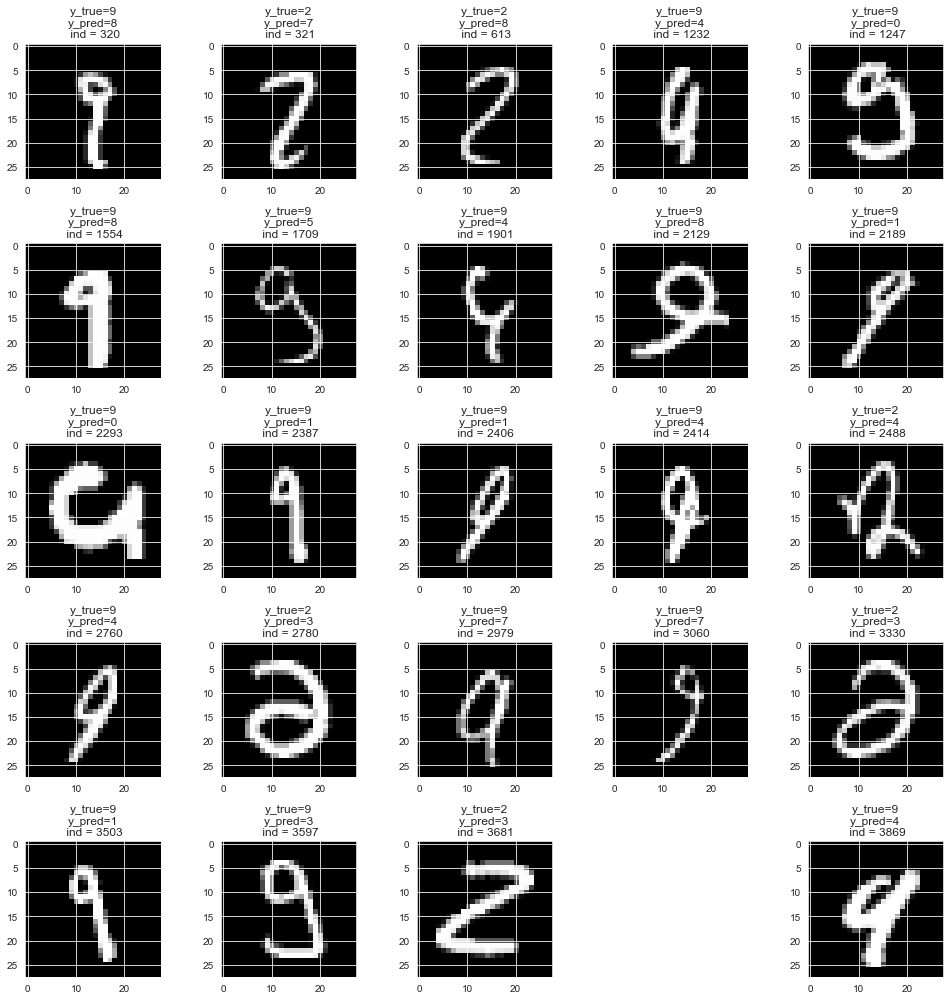

In [70]:
cnt_ind = 1
list_idx = []
#X_val_plot = X_val.reshape( X_val.shape[:-1] )
fig = plt.figure(figsize=(14, 14))

# for idx, (a, b) in enumerate(zip(y_test_lt5, yy)):
#     if np.argmax(a) == np.argmax(b): continue
#     if (np.argmax(a) == 2 or np.argmax(a) == 9):    
#         plt.subplot(5, 5, cnt_ind)
#         plt.imshow(X_val_plot[idx], cmap='gray', interpolation='none')
#         plt.title('y_true={0}\ny_pred={1}\n ind = {2}'.format(np.argmax(a), np.argmax(b), idx))
#         plt.tight_layout()
#         list_idx.append(idx)
#         cnt_ind += 1

for idx, (a, b) in enumerate(zip(y_test, yy)):
    if a == np.argmax(b): continue
    if (a == 2 or a == 9):    
        plt.subplot(5, 5, cnt_ind)
        plt.imshow(X_test_plot[idx], cmap='gray', interpolation='none')
        plt.title('y_true={0}\ny_pred={1}\n ind = {2}'.format(a, np.argmax(b), idx))
        plt.tight_layout()
        list_idx.append(idx)
        cnt_ind += 1

ValueError: num must be 1 <= num <= 25, not 26

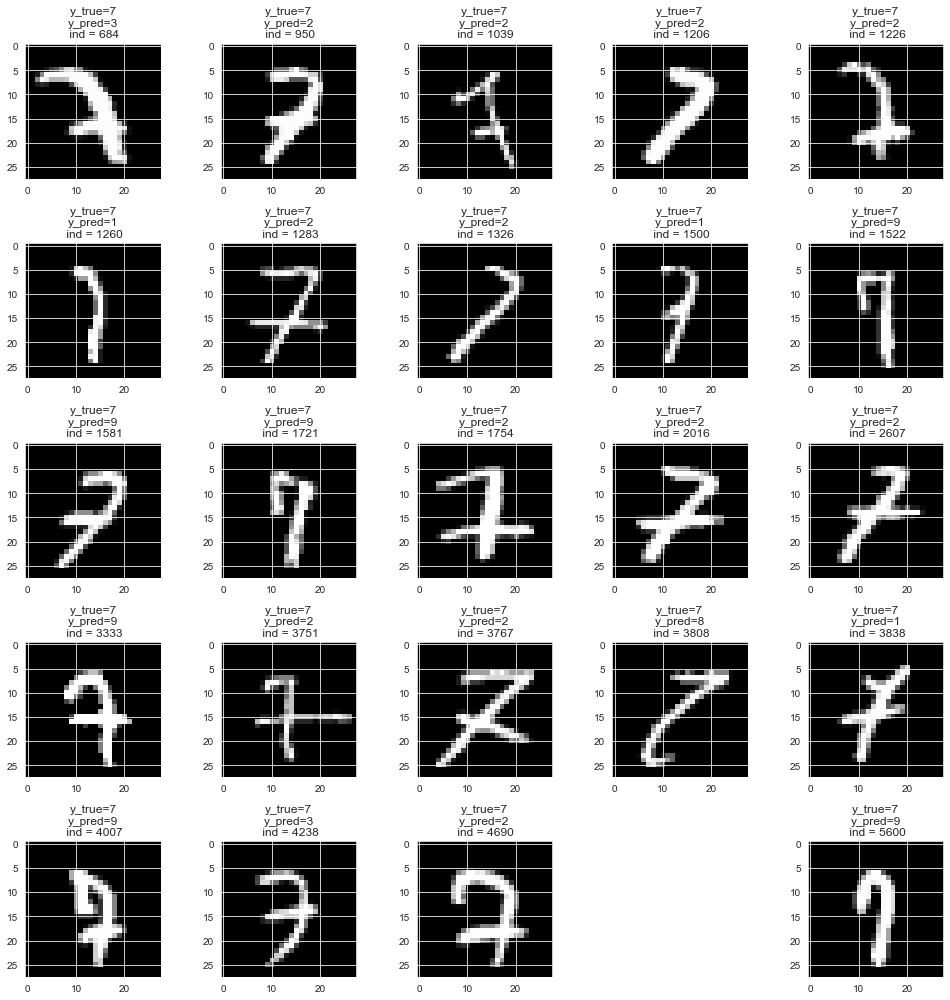

In [75]:
cnt_ind = 1
list_idx = []
fig = plt.figure(figsize=(14, 14))
for idx, (a, b) in enumerate(zip(y_test, yy)):
    if a == np.argmax(b): continue
    if (a == 7):    
        plt.subplot(5, 5, cnt_ind)
        plt.imshow(X_test_plot[idx], cmap='gray', interpolation='none')
        plt.title('y_true={0}\ny_pred={1}\n ind = {2}'.format(a, np.argmax(b), idx))
        plt.tight_layout()
        list_idx.append(idx)
        cnt_ind += 1

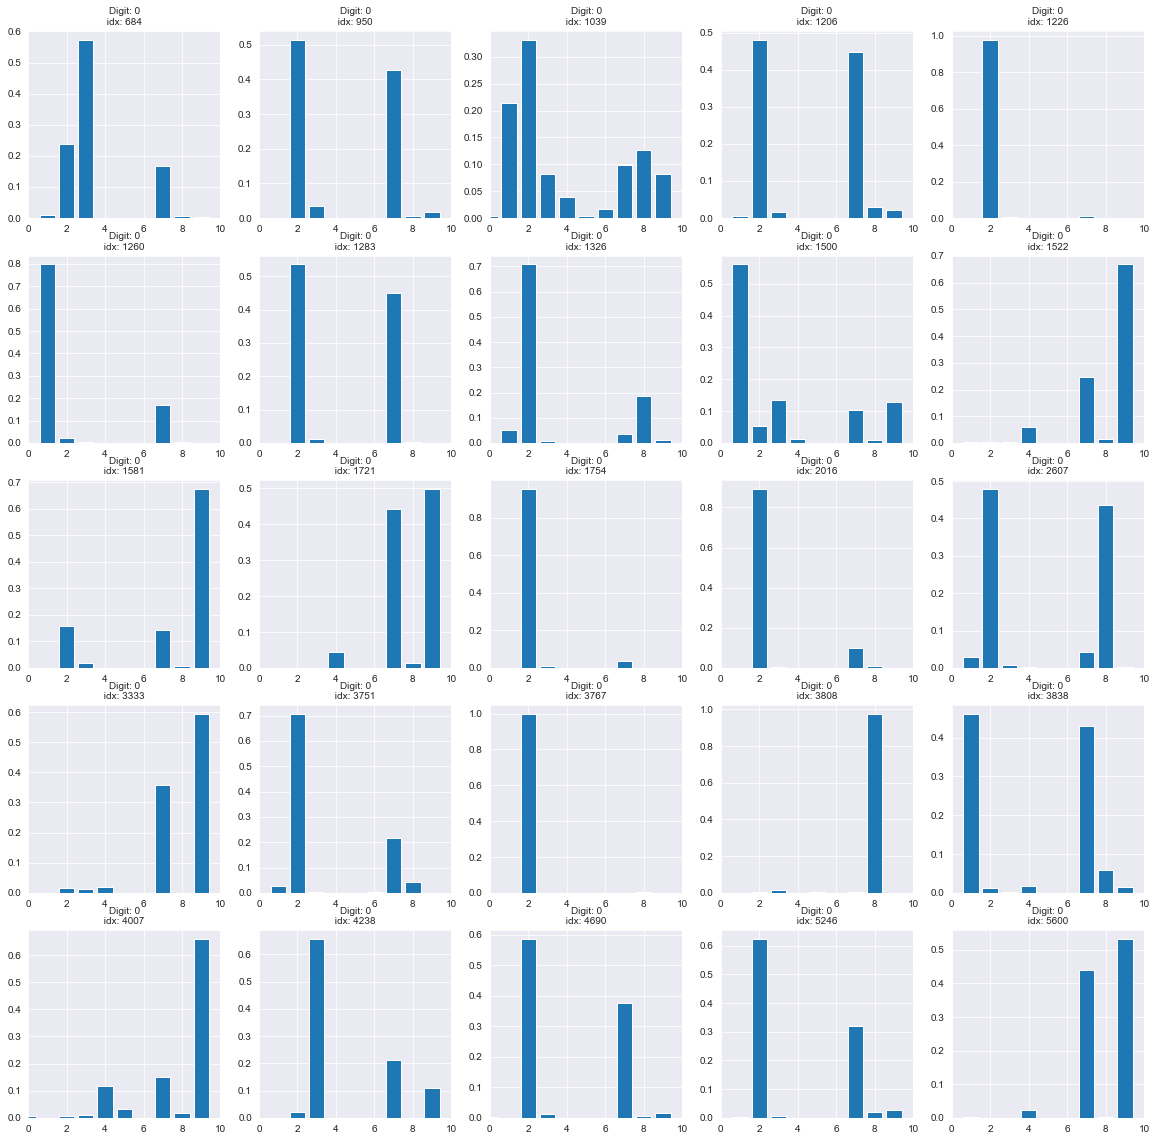

In [81]:
draw_output(list_idx)